In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from moepy import lowess, eda

In [7]:
candidates = ['Kam Buckner', 'Chuy García', "Ja'Mal Green", 
        'Brandon Johnson', 'Sophia King', 'Lori Lightfoot', 
        'Raymond Lopez', 'Roderick Sawyer', 'Paul Vallas', 
        'Willie Wilson', 'Other', 'Undecided']

colors = ['#7b4a4a', '#ff9100', '#d8dc6a', 
        '#34d513', '#1fa3dd', '#ff00ff',
        '#20b2aa', '#4169e1', '#9370db', 
        '#ff0000', '#eeeeee', '#bfbfbf']

{c: {"color": colors[i]} for i, c in enumerate(candidates)}

{'Kam Buckner': {'color': '#7b4a4a'},
 'Chuy García': {'color': '#ff9100'},
 "Ja'Mal Green": {'color': '#d8dc6a'},
 'Brandon Johnson': {'color': '#34d513'},
 'Sophia King': {'color': '#1fa3dd'},
 'Lori Lightfoot': {'color': '#ff00ff'},
 'Raymond Lopez': {'color': '#20b2aa'},
 'Roderick Sawyer': {'color': '#4169e1'},
 'Paul Vallas': {'color': '#9370db'},
 'Willie Wilson': {'color': '#ff0000'},
 'Other': {'color': '#eeeeee'},
 'Undecided': {'color': '#bfbfbf'}}

In [13]:
class Candidate:
    def __init__(self, name, color, line = '--', marker = '.') -> None:
        self.name = name
        self.color = color
        self.line = line
        self.marker = marker


In [38]:
class ChiMayor:
    Kam = Candidate('Kam Buckner', '#7b4a4a')
    Chuy = Candidate('Chuy García', '#ff9100', '--', '.')
    JaMal = Candidate("Ja'Mal Green", '#d8dc6a')
    Brandon = Candidate('Brandon Johnson', '#34d513', '-', '*')
    Sophia = Candidate('Sophia King', '#1fa3dd')
    Lori = Candidate('Lori Lightfoot', '#ff00ff', ':', 'd')
    Raymond = Candidate('Raymond Lopez', '#20b2aa')
    Roderick = Candidate('Roderick Sawyer', '#4169e1')
    Paul = Candidate('Paul Vallas', '#9370db', '', 'v')
    Willie = Candidate('Willie Wilson', '#ff0000', '-.', 's')
    Other = Candidate('Other', '#eeeeee')
    Undecided = Candidate('Undecided', '#bfbfbf', '--', 'x')

    candidates = [Kam, Chuy, JaMal, Brandon, Sophia, Lori, Raymond, Roderick, Paul, Willie, Other, Undecided]
    frontrunners = [Chuy, Brandon, Lori, Paul, Willie, Undecided]
    
    def __init__(self, fp = 'wikipedia_polling_table.xlsx', frac = 1, x_end = 0) -> None:
        self.df = pd.read_excel(fp)
        electionday = np.datetime64('2023-02-28')
        self.df['date_delta'] = (self.df['StartDate']- electionday)  / np.timedelta64(1,'D')
        self.x = self.df['date_delta'].to_numpy()
        x_end = self.x.max() if x_end == -1 else x_end
        self.x_pred = np.linspace(self.x.min(), x_end, 14)
        self.model = lowess.Lowess()
        self.frac = frac


    def plot(self, frontrunners = 0):
        candidates = self.frontrunners if frontrunners else self.candidates
        #for i, c in enumerate(self.candidates):
        for c in candidates:

            y = self.df[c.name].to_numpy()

            self.model.fit(self.x, y, frac=self.frac)
            y_pred = self.model.predict(self.x_pred)

            s = plt.scatter(self.x, y, color = c.color, marker=c.marker)
            p = plt.plot(self.x_pred, y_pred, c.line, label = c.name, color = c.color)
        
        plt.title(label = 'Chicago Mayor Polling Projection')
        plt.legend(handles = [s, p], loc=(1.04, 0), title="Candidate")
        
        plt.xlabel('Days until election day (2/28/2023)')
        plt.ylabel('Polling Percentage')

AttributeError: 'list' object has no attribute 'get_label'

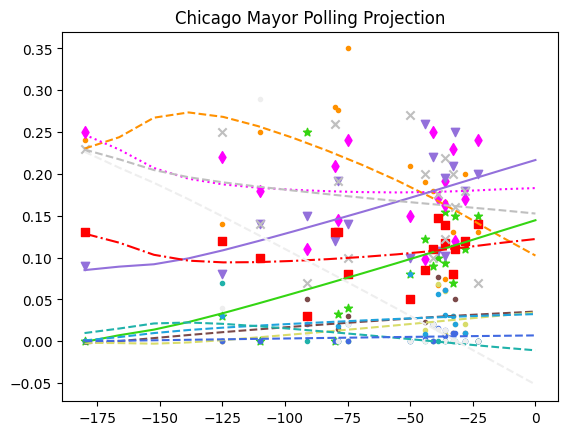

In [39]:
plot1 = ChiMayor()
p = plot1.plot()


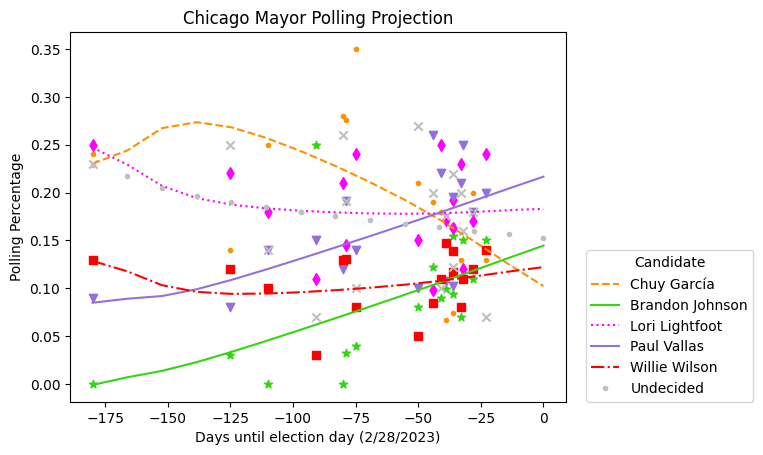

In [36]:
plot1.plot(1)

C:\Users\Laptop\anaconda3\envs\py10\lib\site-packages\moepy\lowess.py:185: RuntimeWarning: divide by zero encountered in divide
  cleaned_residuals = np.clip(residuals / (max_std_dev * std_dev), -1, 1)
C:\Users\Laptop\anaconda3\envs\py10\lib\site-packages\moepy\lowess.py:185: RuntimeWarning: invalid value encountered in divide
  cleaned_residuals = np.clip(residuals / (max_std_dev * std_dev), -1, 1)


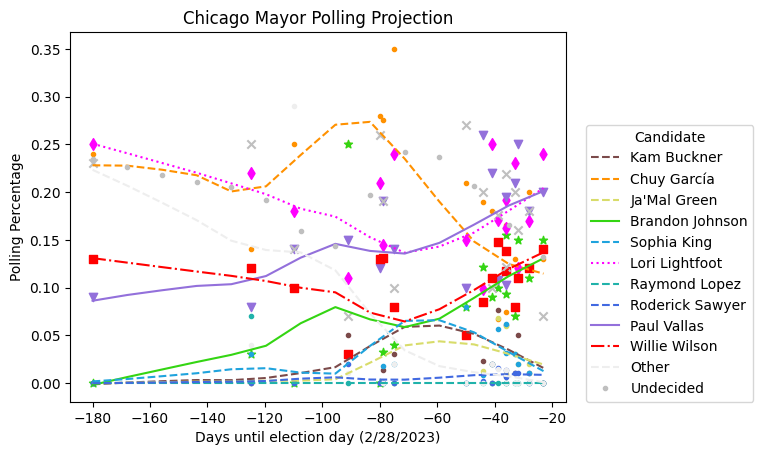

In [28]:
plot2 = ChiMayor(frac=0.5, x_end = -1)
plot2.plot()

C:\Users\Laptop\anaconda3\envs\py10\lib\site-packages\moepy\lowess.py:185: RuntimeWarning: divide by zero encountered in divide
  cleaned_residuals = np.clip(residuals / (max_std_dev * std_dev), -1, 1)
C:\Users\Laptop\anaconda3\envs\py10\lib\site-packages\moepy\lowess.py:185: RuntimeWarning: invalid value encountered in divide
  cleaned_residuals = np.clip(residuals / (max_std_dev * std_dev), -1, 1)


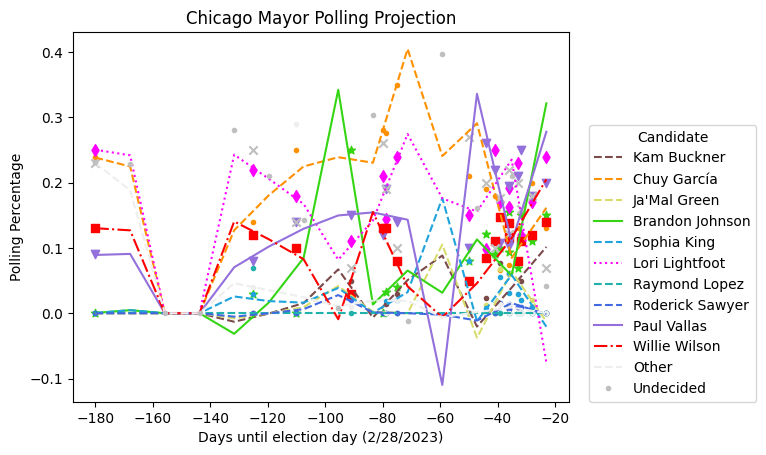

In [29]:
plot3 = ChiMayor(frac=0.2, x_end=-1)
plot3.plot()